### Import Libraries

In [36]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline

### Load the Data

In [2]:
player = pd.read_csv("final_data.csv")

In [3]:
player.shape

(10754, 22)

In [4]:
player.head(2)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


### Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [5]:
# uniqeness
player.drop_duplicates(inplace=True)
player[player.duplicated()]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


In [6]:
# Completeness
player.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [7]:
# Accurecy types
player.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [8]:
# Accurecy - Outlier
# Convert categorical variables using OneHotEncoding

categorical_features = ['team']

numeric_features = ['height', 'age', 'appearance','goals', 'assists', 'yellow cards',
                    'second yellow cards','red cards', 'goals conceded','clean sheets',
                    'minutes played', 'days_injured','games_injured', 'award',
                    'current_value','highest_value','position_encoded',
                    'winger']

In [9]:
for i in categorical_features:
    print (player[i].value_counts())

team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: count, Length: 374, dtype: int64


In [11]:
for i in numeric_features:
    print (player[i].value_counts())

height
180.000000    744
185.000000    608
175.000000    596
178.000000    594
183.000000    572
188.000000    493
184.000000    458
182.000000    449
181.240353    440
186.000000    423
187.000000    419
176.000000    390
177.000000    372
190.000000    371
173.000000    366
179.000000    359
181.000000    355
170.000000    312
191.000000    272
174.000000    270
189.000000    255
172.000000    254
192.000000    203
193.000000    181
171.000000    169
168.000000    124
194.000000    117
169.000000    107
195.000000     98
167.000000     85
196.000000     68
166.000000     44
165.000000     42
197.000000     31
198.000000     24
163.000000     16
160.000000     15
164.000000     14
199.000000     12
200.000000     12
202.000000      6
162.000000      6
161.000000      3
206.000000      2
204.000000      1
156.000000      1
159.000000      1
Name: count, dtype: int64
age
22.000000    841
23.000000    823
26.000000    812
25.000000    772
24.000000    767
21.000000    715
28.000000    67

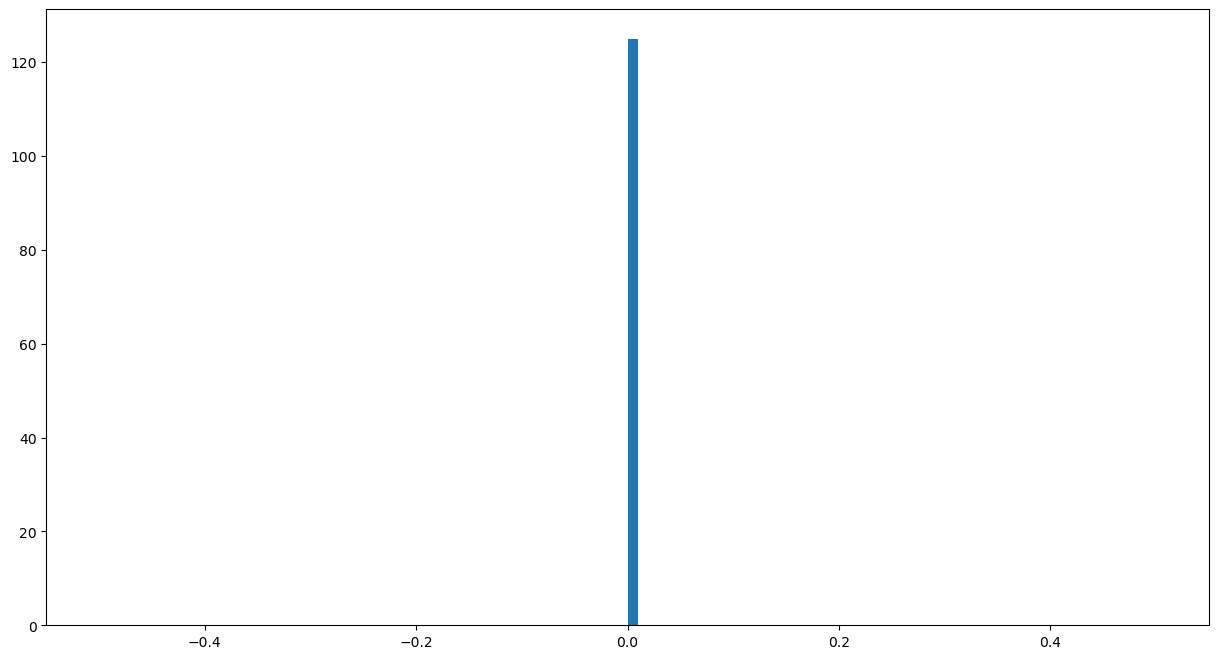

In [12]:
plt.figure(figsize=(15,8))
#plt.boxplot(player['highest_value'])
plt.hist(player[player['highest_value']<=0.25]['highest_value'],bins=100);

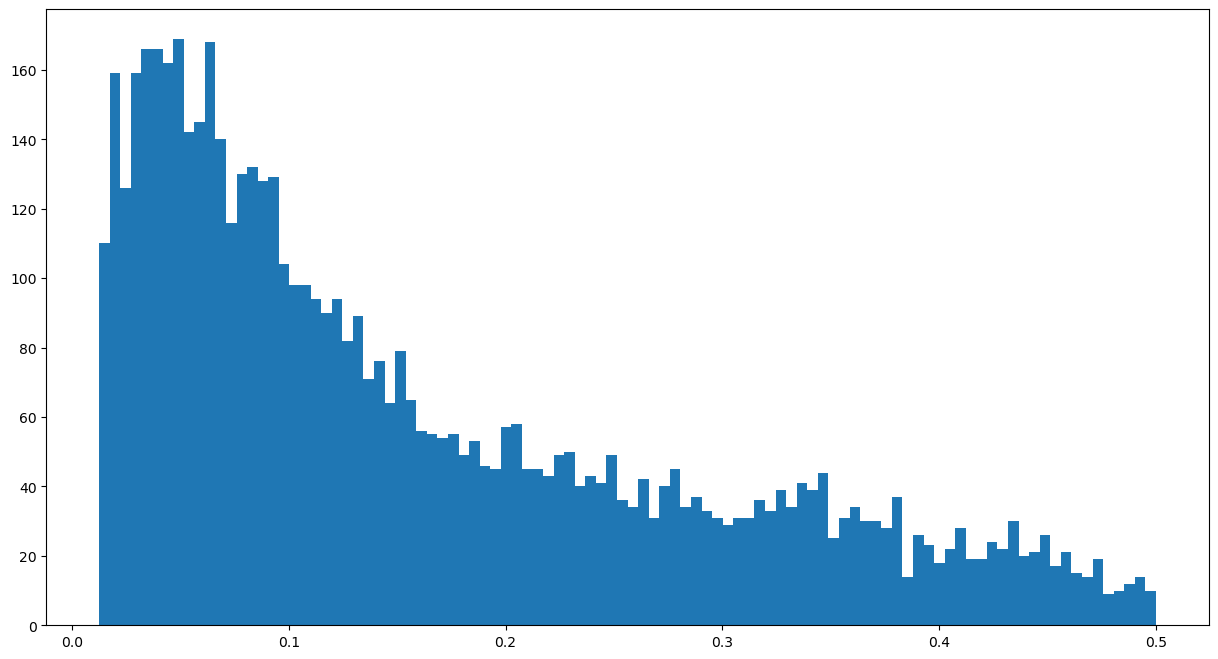

In [13]:
plt.figure(figsize=(15,8))
#plt.boxplot(player['goals'])
plt.hist(player[(player['goals']<=0.5) & (player['goals']>0.0125)]['goals'], bins=100);

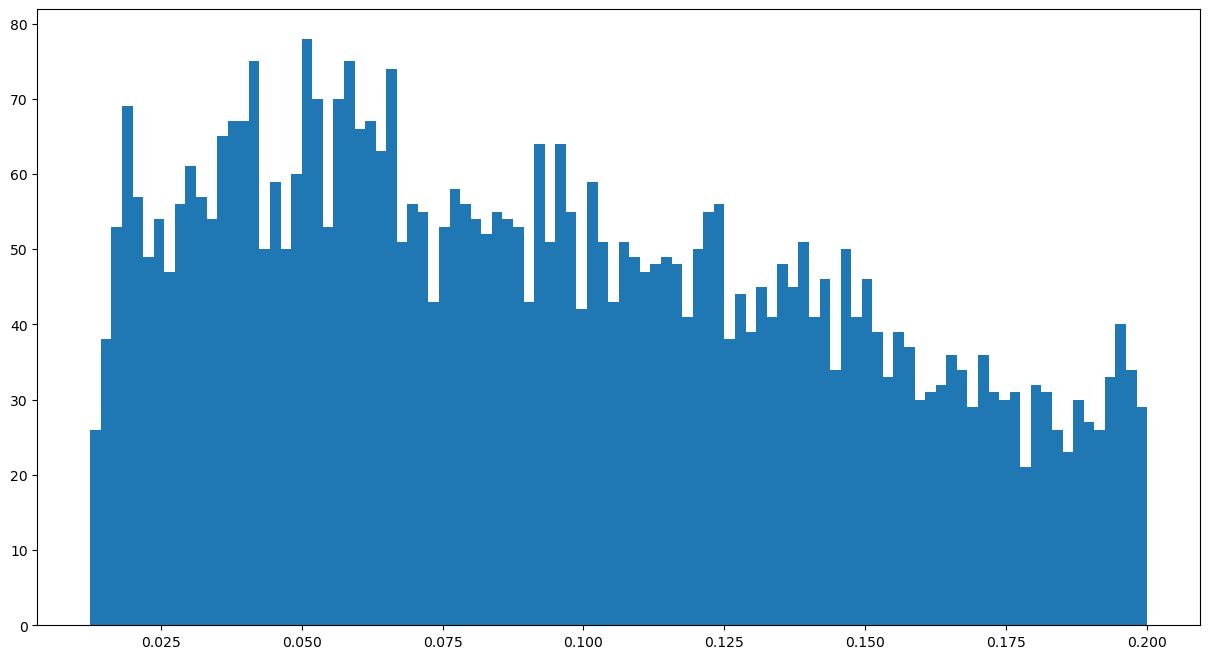

In [14]:
plt.figure(figsize=(15,8))
#plt.boxplot(player['assists']);
plt.hist(player[(player['assists']<=0.2) & (player['assists']>0.0125)]['assists'],bins=100);

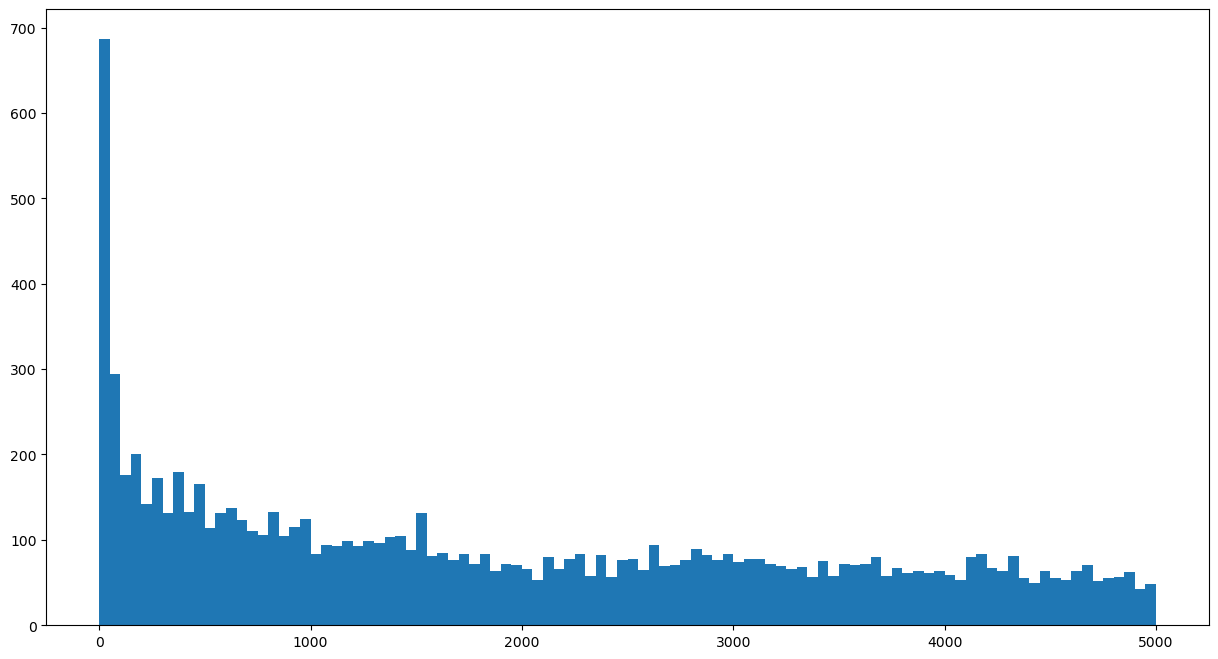

In [15]:
plt.figure(figsize=(15,8))
#plt.boxplot(player['minutes played'])
plt.hist(player[player['minutes played']<=5000]['minutes played'],bins=100);

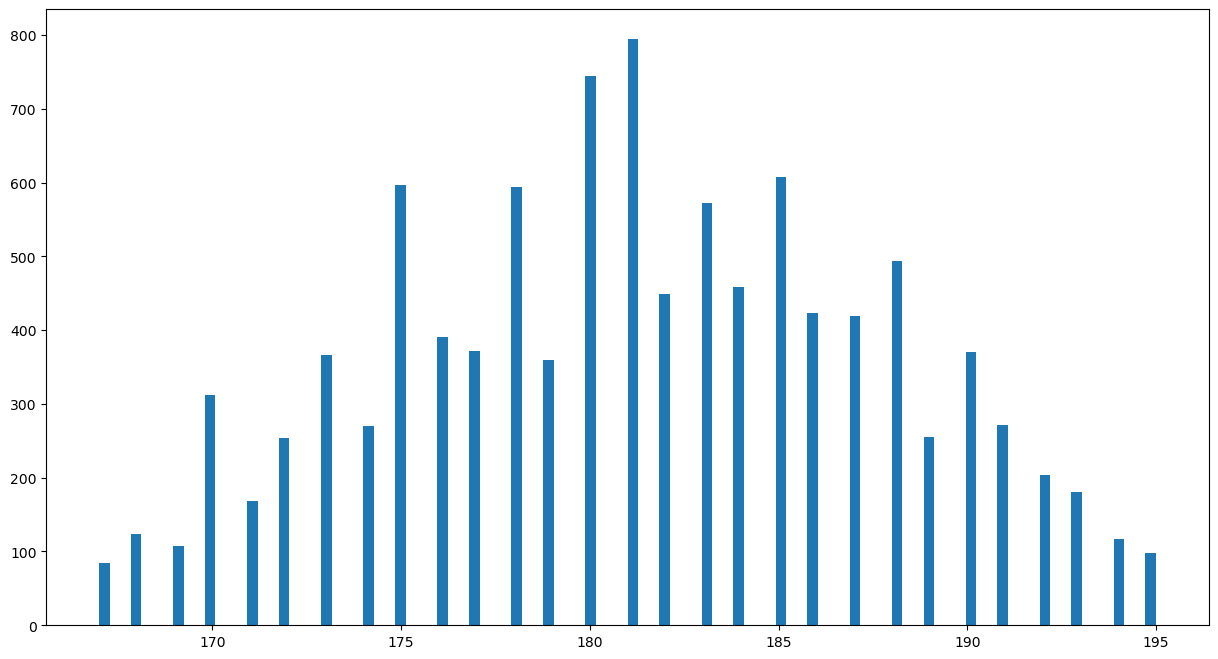

In [16]:
plt.figure(figsize=(15,8))
#plt.boxplot(player['height'])
plt.hist(player[(player['height']<=195) & (player['height']>166)]['height'],bins=100);

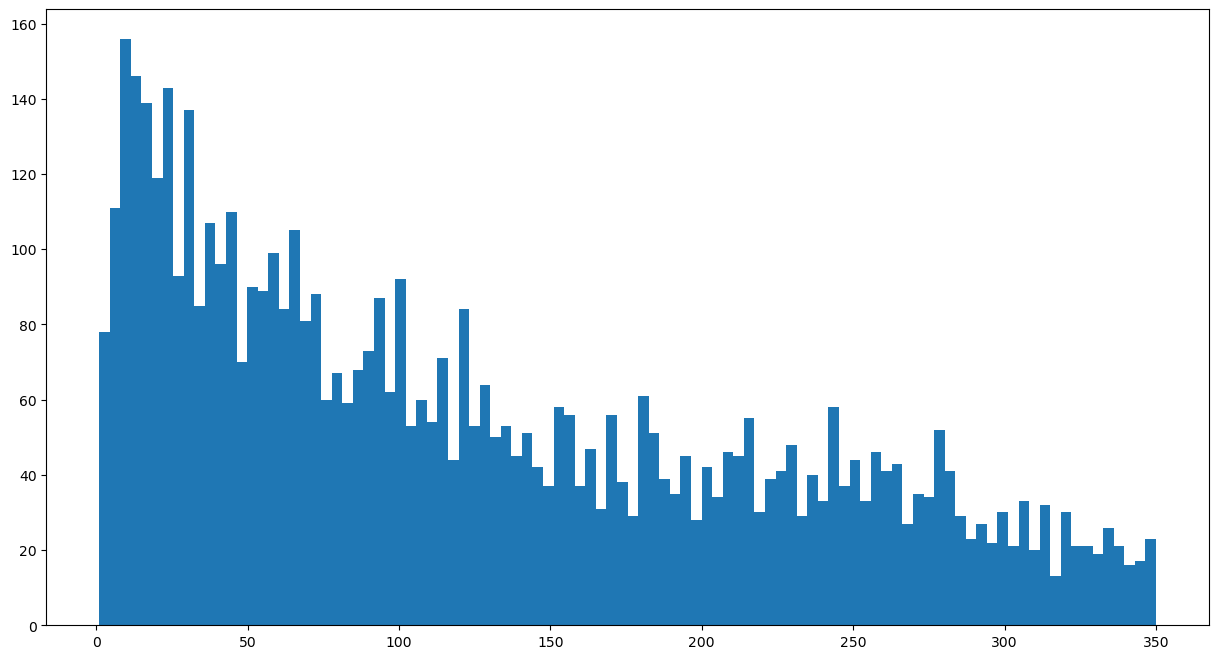

In [17]:
plt.figure(figsize=(15,8))
#plt.boxplot(player['days_injured'])
plt.hist(player[(player['days_injured']<=350) & (player['days_injured']>0)]['days_injured'],bins=100);


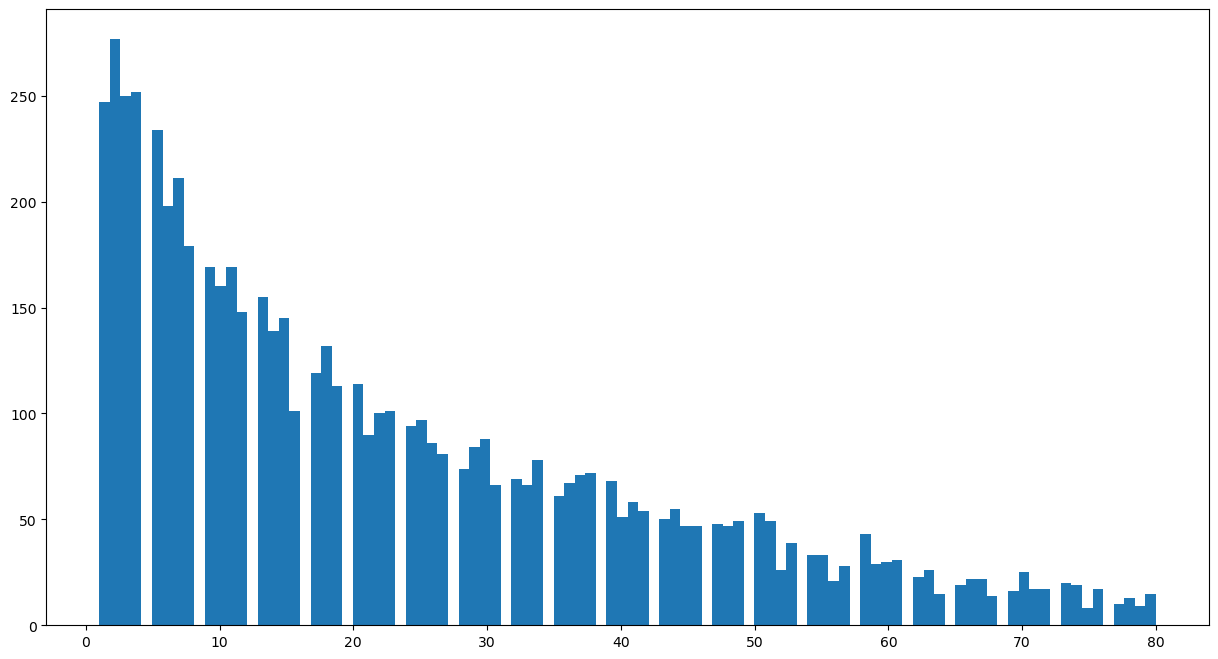

In [18]:
plt.figure(figsize=(15,8))
#plt.boxplot(player['games_injured'])
plt.hist(player[(player['games_injured']<=80) & (player['games_injured']>0)]['games_injured'],bins=100);

#### 2. Feature engineering

1. Feature scaling

2. Aggregation

3. One hot coding

In [19]:
player.head(2)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


In [20]:
categorical_features

['team']

In [21]:
# one hot coding
player = pd.get_dummies(player, columns=categorical_features)

In [22]:
player.shape

(10754, 395)

In [23]:
# Calculate the 20th and 75th percentiles of the price
p20 = player['current_value'].quantile(0.20)
p75 = player['current_value'].quantile(0.75)

# Function to categorize prices
def categorize_price(current_value):
    if current_value < p20:
        return 'Low Value'
    elif current_value < p75:
        return 'Medium Value'
    else:
        return 'High Value'

# Apply the function to create a new column
player['player price category'] = player['current_value'].apply(categorize_price)

player.drop('current_value', axis=1, inplace=True)

# Verify the distribution of the new categories
print(player['player price category'].value_counts())

player price category
Medium Value    6267
High Value      2690
Low Value       1797
Name: count, dtype: int64


In [24]:
p20, p75

(200000.0, 3000000.0)

In [25]:
encoder = LabelEncoder()
player['player price category encoded'] = encoder.fit_transform(player['player price category']) 

#### 3. Feature selection

In [28]:
# only use numeric data in my model!
numeric_player = player.select_dtypes(include=[np.number])

correlation = numeric_player.corr()
#print(correlation['current_value'].sort_values(ascending=False))
print(correlation['player price category encoded'].sort_values(ascending=False))

player price category encoded    1.000000
age                              0.129679
goals conceded                   0.046740
yellow cards                     0.025661
winger                           0.023954
red cards                        0.016435
clean sheets                     0.012854
second yellow cards              0.011286
height                          -0.042982
position_encoded                -0.050054
days_injured                    -0.062428
goals                           -0.078823
assists                         -0.083448
games_injured                   -0.088692
award                           -0.161728
minutes played                  -0.305306
appearance                      -0.311844
highest_value                   -0.466720
Name: player price category encoded, dtype: float64


In [29]:
# Set the correlation threshold
threshold = 0.2  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['player price category encoded']) > \
threshold]['player price category encoded'].index
selected_features

Index(['appearance', 'minutes played', 'highest_value',
       'player price category encoded'],
      dtype='object')

In [32]:
selected_features = ['appearance', 'minutes played', 'highest_value',
       'player price category encoded']

In [33]:
player = player[selected_features]
player.head()

,appearance,minutes played,highest_value,player price category encoded
0,104,9390,70000000,0
1,15,1304,22000000,2
2,4,292,6000000,2
3,82,6408,50000000,0
4,63,5031,80000000,0


#### 4. Prepare train and test data

In [34]:
# Prepare data
X = player.drop(['player price category encoded'], axis=1)
y = player['player price category encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Buliding the Model   

#### RandomForest & DecisionTree

In [37]:
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()

In [62]:
param_grid = {
    'max_depth': [ 7, 10, 15, 20],   # Regularization strength
    'n_estimators':[ 20, 25, 30, 40, 50]
}
grid_search = GridSearchCV(estimator=rf_classifier,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro', 
                           verbose=1)

### Train the Model

In [63]:
# Fit the model on the training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [64]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [65]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 10, 15, 20],
                         'n_estimators': [20, 25, 30, 40, 50]},
             scoring='f1_macro', verbose=1)

In [66]:
grid_search.best_params_

{'max_depth': 10, 'n_estimators': 40}

In [67]:
best_model = grid_search.best_estimator_

## Test the Model

In [71]:
# Predict and evaluate the model
y_pred_dt = dt_classifier.predict(X_test)
y_pred_rf = rf_classifier.predict(X_test)
y_pred_rf_g = best_model.predict(X_test)

### Evaluating the Model


In [72]:
# our benchmark model
base_model = round(player['player price category encoded'].value_counts()[1]/player.shape[0]*100, 2)
base_model

16.71

1. Accuracy

In [73]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_dt)
accuracy

0.8149697814969782

In [74]:
accuracy = accuracy_score(y_test, y_pred_rf)
accuracy

0.8484425848442585

In [75]:
y_pred_train_dt = dt_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train_dt)
accuracy

0.9946530280134837

In [76]:
y_pred_train_rf = rf_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train_rf)
accuracy

0.9946530280134837

In [77]:
accuracy = accuracy_score(y_test, y_pred_rf_g)
accuracy

0.8521617852161785

In [78]:
y_pred_train_rf_g = best_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train_rf_g)
accuracy

0.8950366151342555

2. Confusion Matrix

In [79]:
conf_matrix = confusion_matrix(y_test, y_pred_rf_g)
conf_matrix

array([[ 431,    0,   82],
       [   2,  275,   93],
       [ 141,    0, 1127]], dtype=int64)

In [80]:
print(classification_report(y_test,
                      y_pred_rf_g,
                      labels=list(best_model.classes_)))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       513
           1       1.00      0.74      0.85       370
           2       0.87      0.89      0.88      1268

    accuracy                           0.85      2151
   macro avg       0.87      0.82      0.84      2151
weighted avg       0.86      0.85      0.85      2151



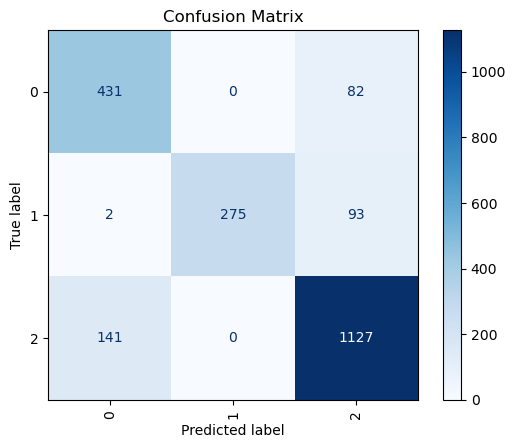

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf_g,
                                        display_labels=best_model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

3. Precision

In [82]:
# Calculate Precision
precision = precision_score(y_test, y_pred_rf_g, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.87


4. Recall

In [83]:
# Calculate Recall
recall = recall_score(y_test, y_pred_rf_g, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.82


5. F1 Score

In [84]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred_rf_g, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.84


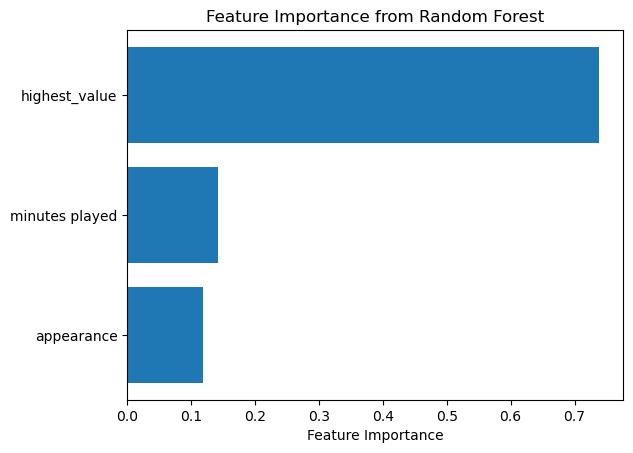

In [85]:
# Feature importance from Random Forest
feature_importances = best_model.feature_importances_
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()